# env setting

In [ ]:
#cannot use cs298 env (I don't know why) 
#install all dependencies 
!pip install tensorflow
!pip install pandas
!pip install seaborn

In [7]:
import os
import tensorflow as tf
import glob
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# helper functions
## read file 

In [8]:
#helper function from read_result.py
#get Train_EnvstepsSoFar and Eval_AverageReturn

def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':#train steps
                X.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Y.append(v.simple_value)
    return X, Y

## Collect outcomes of multiple different random seeds


(no need to use because sns can plot derectly )

In [9]:
'''

import os
from collections import defaultdict
import shutil 

#Collect return of multiple different random seeds by experiments name(prefix)

def average_results_of_seeds(prefix):
    
    data = defaultdict(dict) 
    data_diff_seeds = []
    
    
    for filename in os.listdir('data'): # list all files + directories in current folder
        if filename.startswith(prefix): # filter out files that start with specified prefix only
            print(filename) # found matched files

            # read each file 
            logdir = os.path.join('data', filename, 'events*')
            eventfile = glob.glob(logdir)[0] #retrieve files/pathnames matching a specified pattern
            X, data_this_seed  = get_section_results(eventfile)
   
            data_diff_seeds.append(data_this_seed)#append all the data
            
            # if the Experiment failed or interrupt, delete it
            if len(data_this_seed) < 10:
                print('remove this file',os.path.join('data', filename))
                shutil.rmtree(os.path.join('data', filename))

                
    #calculate mean and std over seeds
    data['return_mean'] = np.mean(data_diff_seeds, axis=0)
    data['return_std'] = np.std(data_diff_seeds, axis=0)
    #print('data',data)
    data = pd.DataFrame.from_dict(data)#transfrom to pd.DataFrame
    return data
'''

"\n\nimport os\nfrom collections import defaultdict\nimport shutil \n\n#Collect return of multiple different random seeds by experiments name(prefix)\n\ndef average_results_of_seeds(prefix):\n    \n    data = defaultdict(dict) \n    data_diff_seeds = []\n    \n    \n    for filename in os.listdir('data'): # list all files + directories in current folder\n        if filename.startswith(prefix): # filter out files that start with specified prefix only\n            print(filename) # found matched files\n\n            # read each file \n            logdir = os.path.join('data', filename, 'events*')\n            eventfile = glob.glob(logdir)[0] #retrieve files/pathnames matching a specified pattern\n            X, data_this_seed  = get_section_results(eventfile)\n   \n            data_diff_seeds.append(data_this_seed)#append all the data\n            \n            # if the Experiment failed or interrupt, delete it\n            if len(data_this_seed) < 10:\n                print('remove this

In [10]:
'''
#test example
data=average_results_of_seeds(prefix='q1_lb_no_rtg')
data
'''

"\n#test example\ndata=average_results_of_seeds(prefix='q1_lb_no_rtg')\ndata\n"

## read data for plot

In [13]:
#read data from multiple files by name with same prefix
import shutil

def read_data(prefix, env_name):
    full_data = pd.DataFrame()

    for filename in os.listdir('data'): # list all files + directories in current folder
        if filename.startswith(prefix): # filter out files that start with specified prefix(exp_name) only
            print(filename) # found matched files
            
            #____read file____
            logdir = os.path.join('data', filename, 'events*')#get the whole path of a specific file
            eventfile = glob.glob(logdir)[0] #retrieve files/pathnames matching a specified pattern
            X,Y = get_section_results(eventfile)#read data 
            
            # if the Experiment failed or interrupt(iteration less than 100), delete it
            if len(X) < 100:
                print('remove this file',os.path.join('data', filename))
                shutil.rmtree(os.path.join('data', filename))
            
            #____get experiment and seed name____ from filename. To automaticly generate plot legend 
            split = filename.split('_')#split folder name of experement data  
            
            if 'seed' in split:
                Exp_list = split[1:split.index('seed')]
                Exp = '_'.join(Exp_list) 
                #print('split',split)
                #print(Exp_list)
                #print('Exp',Exp)
                seed_list= split[split.index('seed'):split.index(env_name)]
                seed = '_'.join(seed_list) 
            else:
                Exp_list = split[1:split.index(env_name)]
                Exp = '_'.join(Exp_list) 
            
            
                
                
            
            
            #____create dataset____
            data = pd.DataFrame({'Iteration': range(len(X)), 
                                 'Experiment': np.repeat(Exp, len(X)),
                                 #'seed':np.repeat(seed,len(X)),
                                 'Train_EnvstepsSoFar': X, 
                                 'Eval_AverageReturn': Y})
            #data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            if 'seed' in split:
                data['seed']=np.repeat(seed,len(X))
            
        
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)
            full_data.head()
            
            
    return full_data


#test example
data_q1_lb= read_data(prefix='q1_lb',env_name= 'CartPole-v0')

q1_lb_no_rtg_dsa_seed_3_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_3_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_no_rtg_dsa_seed_0_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_0_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_3_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_1_CartPole-v0_04-03-2021_16-50-59
q1_lb_no_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-59
q1_lb_no_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_4_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_na_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_no_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_dsa_seed_0_CartPole-v0_04-03-2021_16-50-58


## Plot 

In [14]:
#set plot
figsize=(5.7, 3)
export_dir = os.path.join('solution', 'figures')

sns.set_theme()#seaborn  On later versions, it must be explicitly invoked.
sns.set_context("paper")
sns.set_style("whitegrid")

### Plot functions

In [128]:
#plot mean over different seeds 
'''
plot_std : a flag : plot std or not
'''

def plot_return(data_to_plot,fig_name, config, plot_std=False):
    plt.figure(figsize=figsize)
    
    if plot_std == True :
        sns.lineplot(data=data_to_plot, x='Iteration', y='Eval_AverageReturn', 
                     hue= config, 
                     #style= config,
                     #size = config, 
                     ci="sd")
    else:
        sns.lineplot(data=data_to_plot, x='Iteration', y='Eval_AverageReturn', 
                     hue= config, 
                     #style= config, 
                     #size= config, 
                     ci=None)
    #save
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(os.path.join(export_dir, '{}.png'.format(fig_name)), bbox_inches='tight')

In [16]:
#plot hyper parameter  


def plot_hyper(data_to_plot,fig_name, config):
    plt.figure(figsize=figsize)
    
    
    sns.scatterplot(data=data_to_plot, x='batch size', y='learning rate', 
                     hue= config)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(os.path.join(export_dir, '{}.png'.format(fig_name)), bbox_inches='tight')

In [92]:
'''


#plot givn data and save figure
def plot_overseeds(data_to_plot,fig_name):
    plt.figure(figsize=figsize)
    sns.lineplot(data=data_to_plot, x='Iteration', y='Eval_AverageReturn_overseeds_Smooth', hue='Experiment')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(os.path.join(export_dir, '{}.png'.format(fig_name)), bbox_inches='tight')
    
'''

"\n\n\n#plot givn data and save figure\ndef plot_overseeds(data_to_plot,fig_name):\n    plt.figure(figsize=figsize)\n    sns.lineplot(data=data_to_plot, x='Iteration', y='Eval_AverageReturn_overseeds_Smooth', hue='Experiment')\n\n    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)\n    plt.savefig(os.path.join(export_dir, '{}.png'.format(fig_name)), bbox_inches='tight')\n    \n"

# Experiment 1

large batch
q1_lb_no_rtg_dsa_seed_3_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_3_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_no_rtg_dsa_seed_0_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_0_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_3_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_1_CartPole-v0_04-03-2021_16-50-59
q1_lb_no_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-59
q1_lb_no_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_4_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_na_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_no_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_dsa_seed_0_CartPole-v0_04-03-2021_16-50-58
small batch
q1_sb_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-58
q1_sb_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-58
q1_sb_no_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_sb_rtg

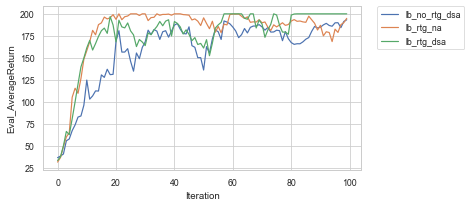

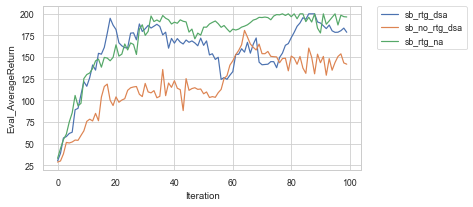

In [20]:
print('large batch')
data_q1_lb = read_data('q1_lb','CartPole-v0')
plot_return(data_q1_lb, 'q1_lb',config='Experiment')

print('small batch')
data_q1_sb = read_data('q1_sb','CartPole-v0')
plot_return(data_q1_sb, 'q1_sb',config='Experiment')

# helper funtions
## add colunms to pandas data

In [50]:
#add colunm

def data_add_column(my_str):
    splits = my_str.split("_")
    for split in splits:
        if split.startswith('b'):
            b = int(split[1:])
        if split.startswith('r0'): 
            lr = float(split[1:])
        
    new_col = (b,lr)

    return pd.Series(new_col)



#add ds and lr coloum to data set
def data_add_bs_lr(data):
    #add column for config
    data[["batch size", "learning rate"]] = data["Experiment"].apply(data_add_column)
    return data

# Experiment 2

In [37]:


data_q2 = read_data('q2','InvertedPendulum-v2')
data_q2
#plot_return(data_q2, 'q2')


q2_b2000_r0.04_seed_1_InvertedPendulum-v2_10-03-2021_09-20-37
q2_b512_r0.03_seed_0_InvertedPendulum-v2_09-03-2021_08-42-17
q2_b4096_r0.05_seed_1_InvertedPendulum-v2_08-03-2021_21-03-16
q2_b700_r0.05_seed_0_InvertedPendulum-v2_10-03-2021_09-20-36
q2_b300_r0.05_seed_2_InvertedPendulum-v2_10-03-2021_09-20-34
q2_b8192_r0.05_seed_0_InvertedPendulum-v2_08-03-2021_21-03-16
q2_b500_r0.06_seed_0_InvertedPendulum-v2_10-03-2021_09-20-36
q2_b1000_r0.02_seed_2_InvertedPendulum-v2_10-03-2021_09-20-36
q2_b4096_r0.04_seed_0_InvertedPendulum-v2_09-03-2021_08-42-17
q2_b2048_r0.03_seed_2_InvertedPendulum-v2_09-03-2021_08-42-15
q2_b512_r0.03_seed_1_InvertedPendulum-v2_09-03-2021_08-42-16
q2_b4096_r0.1_seed_2_InvertedPendulum-v2_08-03-2021_21-03-16
q2_b256_r0.06_seed_2_InvertedPendulum-v2_09-03-2021_08-42-16
q2_b512_r0.006_seed_1_InvertedPendulum-v2_09-03-2021_08-42-17
q2_b300_r0.03_seed_0_InvertedPendulum-v2_10-03-2021_09-20-36
q2_b300_r0.03_seed_1_InvertedPendulum-v2_10-03-2021_09-20-36
q2_b256_r0.03_see

,Iteration,Experiment,Train_EnvstepsSoFar,Eval_AverageReturn,seed
0,0,b2000_r0.04,2004.0,11.000000,seed_1
1,1,b2000_r0.04,4014.0,19.142857,seed_1
2,2,b2000_r0.04,6024.0,15.333333,seed_1
3,3,b2000_r0.04,8035.0,22.555555,seed_1
4,4,b2000_r0.04,10073.0,9.756098,seed_1
...,...,...,...,...,...
26595,95,b4096_r0.01,441130.0,1000.000000,seed_2
26596,96,b4096_r0.01,446172.0,815.000000,seed_2
26597,97,b4096_r0.01,450511.0,670.000000,seed_2
26598,98,b4096_r0.01,454617.0,533.500000,seed_2


##  speed
### the first time to reach largest return

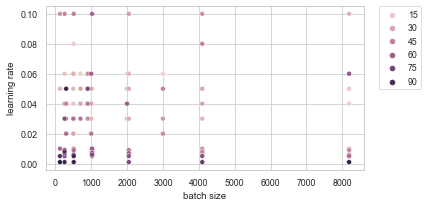

In [38]:
#speed to reach largest return

#get the largest return
df = data_q2
idx = df.groupby(['Experiment'])['Eval_AverageReturn'].transform(max) == df['Eval_AverageReturn']
df[idx]

#get the first value of max return
df_first= df[idx].groupby('Experiment').first().reset_index()


#sort Experiments with largest return and smallest iteration

df_first = df_first.sort_values(["Eval_AverageReturn", "Iteration"], ascending = (False, True))
df_first= df_first.drop(columns=['Train_EnvstepsSoFar'])

#add column for config
df_first = data_add_bs_lr(df_first)
df_first

plot_hyper(data_to_plot=df_first,fig_name='q2_hyper_speed', config='Iteration')

#### hyper search
we want the number of iteration is small and small batch size, large learning rate 

->points in light color locataed in top left corner

- bs <2000
- ls in [0.05,0.08]

In [100]:
#print(df_first.to_latex(index=False)) 

\begin{tabular}{lrr}
\toprule
   Experiment &  Iteration &  Eval\_AverageReturn \\
\midrule
   b800\_r0.08 &         25 &         1000.000000 \\
  b1000\_r0.08 &         27 &         1000.000000 \\
   b500\_r0.01 &         57 &         1000.000000 \\
   b300\_r0.01 &         61 &         1000.000000 \\
  b1000\_r0.05 &         72 &         1000.000000 \\
   b300\_r0.02 &         85 &         1000.000000 \\
  b1000\_r0.07 &         92 &          260.500000 \\
 b10000\_r0.01 &         46 &          243.500000 \\
  b1000\_r0.09 &          9 &          197.333328 \\
  b10000\_r0.1 &         66 &          165.000000 \\
b10000\_r0.001 &         97 &          154.333328 \\
 b1000\_r0.001 &         97 &          154.333328 \\
  b1000\_r0.01 &         97 &          154.333328 \\
   b1000\_r0.1 &         97 &          154.333328 \\
   b500\_r0.08 &         37 &          101.250000 \\
  b100\_r0.001 &         76 &           90.000000 \\
   b100\_r0.01 &         76 &           90.000000 \\
    b10

# the number of iteration in which average return > threshold

In [70]:
#how many times average return larger than threshold in the end of training process
def get_num_iteration(data, threshold):
    #remove Iteration at the begining,keep the end
    df_filtered = data[data['Iteration'] >= 70]
    df_over_threshold=df_filtered
    
    #compuate the number of iteration
    result = df_over_threshold.assign(return_over_threshold=df.Eval_AverageReturn.ge(threshold))
    result =result.groupby('Experiment').agg({'return_over_threshold': 'sum'}).astype(int).reset_index()


    result= result.sort_values("return_over_threshold", ascending = False)
    
    #add column for config
    result[["batch size", "learning rate"]] = result["Experiment"].apply(data_add_column)


    return result




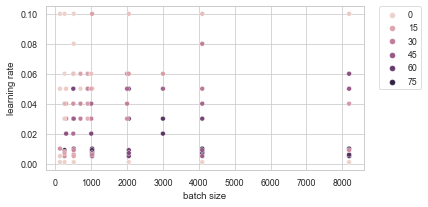

In [71]:
df_over_threshold = get_num_iteration(data_q2, threshold=900)
df_over_threshold
plot_hyper(data_to_plot=df_over_threshold,fig_name='q2_hyper_over_threshold', config='return_over_threshold')

#### hyper search
we want the number of iteration over threshold is large and small batch size, large learning rate 

->points in dark color locataed in top left corner

- bs [300,2000]
- ls in [0.03,0.06]

### optimal hyper

In [72]:
#find smalest bs and largest lr
df_hyper_optimal = df_over_threshold.sort_values(["return_over_threshold","batch size", "learning rate"], ascending = (False,True,False))

#df_hyper_optimal= df_hyper_optimal.drop(columns=['Train_EnvstepsSoFar'])
df_hyper_optimal


,Experiment,return_over_threshold,batch size,learning rate
53,b4096_r0.01,77,4096.0,0.010
81,b8192_r0.01,75,8192.0,0.010
35,b256_r0.009,73,256.0,0.009
51,b4096_r0.008,71,4096.0,0.008
10,b1024_r0.01,69,1024.0,0.010
...,...,...,...,...
72,b512_r0.1,0,512.0,0.100
64,b512_r0.001,0,512.0,0.001
22,b2048_r0.001,0,2048.0,0.001
48,b4096_r0.001,0,4096.0,0.001


In [122]:
print(df_hyper_optimal.drop(columns=['Experiment']).to_latex(index=False)) 

\begin{tabular}{rrr}
\toprule
 return\_over\_threshold &  batch size &  learning rate \\
\midrule
                    77 &      4096.0 &          0.010 \\
                    75 &      8192.0 &          0.010 \\
                    73 &       256.0 &          0.009 \\
                    71 &      4096.0 &          0.008 \\
                    69 &      1024.0 &          0.010 \\
                    69 &      1024.0 &          0.008 \\
                    68 &      8192.0 &          0.005 \\
                    66 &      1024.0 &          0.009 \\
                    66 &      8192.0 &          0.006 \\
                    64 &      3000.0 &          0.030 \\
                    63 &      3000.0 &          0.020 \\
                    63 &      4096.0 &          0.007 \\
                    59 &      2048.0 &          0.030 \\
                    55 &       500.0 &          0.050 \\
                    55 &      2048.0 &          0.005 \\
                    55 &      4096.0 &         

q2_b4096_r0.01_seed_0_InvertedPendulum-v2_08-03-2021_21-03-17
q2_b4096_r0.01_seed_1_InvertedPendulum-v2_08-03-2021_21-03-17
q2_b4096_r0.01_seed_2_InvertedPendulum-v2_08-03-2021_21-03-17


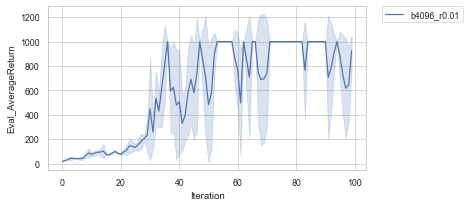

In [73]:
#plot optimal
data_q2_optimal = read_data('q2_b4096_r0.01','InvertedPendulum-v2')
plot_return(data_q2_optimal, 'q2_optimal',config='Experiment',plot_std=True)

additional_nnbaseline_q2_b4096_r0.01_seed_2_InvertedPendulum-v2_11-03-2021_21-30-15
additional_nnbaseline_q2_b4096_r0.01_seed_0_InvertedPendulum-v2_11-03-2021_21-30-15
additional_nnbaseline_q2_b4096_r0.01_seed_1_InvertedPendulum-v2_11-03-2021_21-30-15


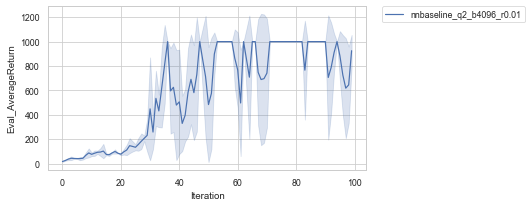

In [131]:
data_q2_optimal = read_data('additional_nnbaseline_q2_b4096_r0.01','InvertedPendulum-v2')
plot_return(data_q2_optimal, 'additional_nnbaseline_q2_optimal',config='Experiment',plot_std=True)

# Experiment 4

q4_serach_b30000_lr0.02_rtg_nnbaseline_seed_3_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b10000_lr0.005_rtg_nnbaseline_seed_3_HalfCheetah-v2_04-03-2021_20-18-03
q4_serach_b10000_lr0.02_rtg_nnbaseline_seed_3_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b30000_lr0.005_rtg_nnbaseline_seed_2_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b50000_lr0.02_rtg_nnbaseline_seed_1_HalfCheetah-v2_04-03-2021_20-18-05
q4_serach_b30000_lr0.01_rtg_nnbaseline_seed_1_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b30000_lr0.005_rtg_nnbaseline_seed_4_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b50000_lr0.01_rtg_nnbaseline_seed_3_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b10000_lr0.01_rtg_nnbaseline_seed_1_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b50000_lr0.005_rtg_nnbaseline_seed_1_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b30000_lr0.02_rtg_nnbaseline_seed_2_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b10000_lr0.005_rtg_nnbaseline_seed_2_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b50000_lr0.02

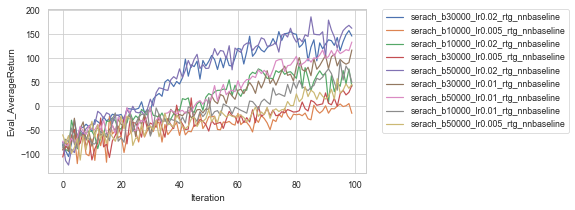

In [79]:
data_q4_serach = read_data('q4_serach','HalfCheetah-v2')
plot_return(data_q4_serach, 'q4_serach',config='Experiment')

### compare with fixed batch size or learning rate

In [129]:



#compare with fixed batch size or learning rate

def hyper_fix_bs(bs,data,exp_name):
    #fix batch size
    hyper_compare_name = "bs_{}".format(bs)
    
    hyper_compare_data = data[data['batch size'] == bs] 
    
    hyper_compare_data.to_csv(os.path.join(export_dir, 'q4_{}.csv'.format(hyper_compare_name)), index = False)

    hyper_compare_data['learning rate'] = 'lr' + hyper_compare_data['learning rate'].astype(str)# add string prefix to make the plot hue clear
    plot_return(hyper_compare_data, '{}_hyper_fix_{}'.format(exp_name,hyper_compare_name), config = 'learning rate',plot_std=True)

def hyper_fix_lr(lr,data,exp_name):
    #fix learning rate
    hyper_compare_name = "lr_{}".format(lr)
        

    hyper_compare_data = data[data['learning rate'] == lr]
    

    hyper_compare_data['batch size'] = 'b' + hyper_compare_data['batch size'].astype(str)# add string prefix to make the plot hue clear
    plot_return(hyper_compare_data, '{}_hyper_fix_{}'.format(exp_name, hyper_compare_name), config = 'batch size',plot_std=True)




      Iteration                            Experiment  Train_EnvstepsSoFar  \
0             0   serach_b30000_lr0.02_rtg_nnbaseline              30000.0   
1             1   serach_b30000_lr0.02_rtg_nnbaseline              60000.0   
2             2   serach_b30000_lr0.02_rtg_nnbaseline              90000.0   
3             3   serach_b30000_lr0.02_rtg_nnbaseline             120000.0   
4             4   serach_b30000_lr0.02_rtg_nnbaseline             150000.0   
...         ...                                   ...                  ...   
4495         95  serach_b50000_lr0.005_rtg_nnbaseline            4809600.0   
4496         96  serach_b50000_lr0.005_rtg_nnbaseline            4859700.0   
4497         97  serach_b50000_lr0.005_rtg_nnbaseline            4909800.0   
4498         98  serach_b50000_lr0.005_rtg_nnbaseline            4959900.0   
4499         99  serach_b50000_lr0.005_rtg_nnbaseline            5010000.0   

      Eval_AverageReturn    seed  batch size  learning rate  
0

<ipython-input-129-fb9e22e36409>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyper_compare_data['learning rate'] = 'lr' + hyper_compare_data['learning rate'].astype(str)# add string prefix to make the plot hue clear
<ipython-input-129-fb9e22e36409>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyper_compare_data['learning rate'] = 'lr' + hyper_compare_data['learning rate'].astype(str)# add string prefix to make the plot hue clear
<ipython-input-129-fb9e22e36409>:11: SettingWithCopyWarning: 
A valu

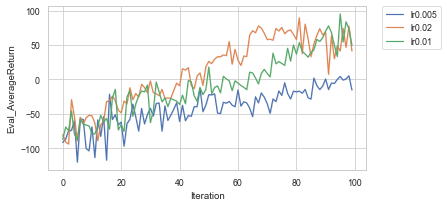

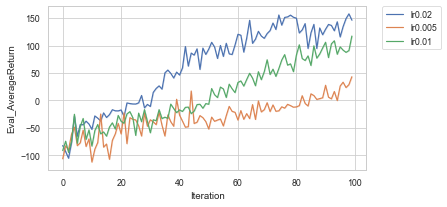

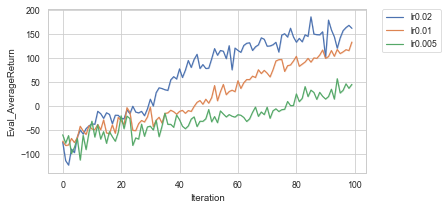

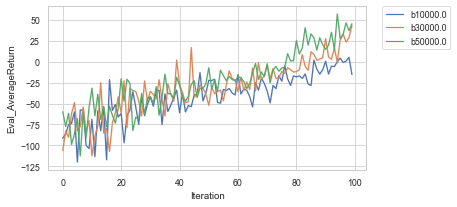

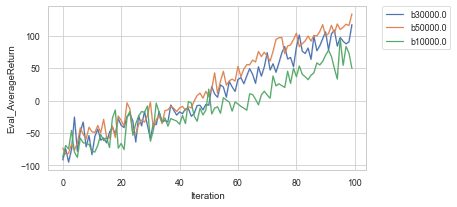

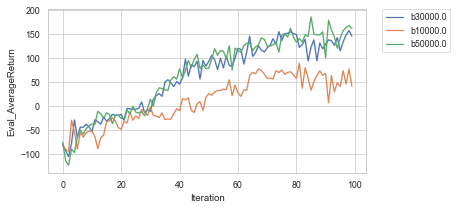

In [130]:
def data_add_column_q4(my_str):
    splits = my_str.split("_")
    for split in splits:
        if split.startswith('b'):
            b = int(split[1:])
        if split.startswith('lr0'): 
            lr = float(split[2:])
        
    new_col = (b,lr)

    return pd.Series(new_col)

#add ds and lr coloum to data set
def data_add_bs_lr_q4(data):
    #add column for config
    data[["batch size", "learning rate"]] = data["Experiment"].apply(data_add_column_q4)
    return data


data_q4_serach = data_add_bs_lr_q4(data_q4_serach)

print(data_q4_serach)


bss = [10000,30000,50000]
lrs = [0.005,0.010,0.02]



for bs in bss:
    hyper_fix_bs(bs,data=data_q4_serach,exp_name='q4')
    
for lr in lrs:
    hyper_fix_lr(lr,data=data_q4_serach,exp_name='q4')


q4_b50000_lr0.02_seed_2_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_nnbaseline_seed_0_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_seed_4_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_rtg_seed_0_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_rtg_nnbaseline_seed_0_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_seed_3_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_nnbaseline_seed_1_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_rtg_seed_1_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_rtg_nnbaseline_seed_1_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_rtg_nnbaseline_seed_4_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_rtg_seed_4_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_seed_0_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_nnbaseline_seed_2_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_nnbaseline_seed_4_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_rtg_seed_2_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_

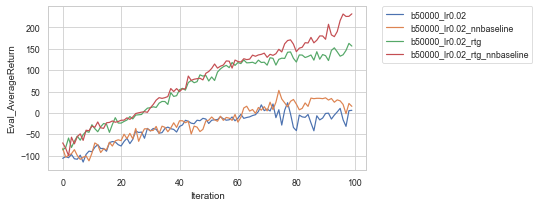

In [558]:
data_q4_optimal = read_data('q4_b','HalfCheetah-v2')
plot_return(data_q4_optimal, 'q4_b')

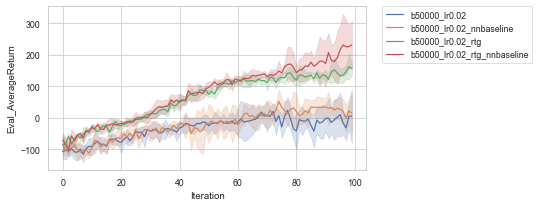

In [575]:
plot_return(data_q4_optimal, 'q4_optimal_with_std',plot_std=True)

# Experiment 3

q3_b40000_r0.005_LunarLanderContinuous-v2_25-02-2021_09-01-56


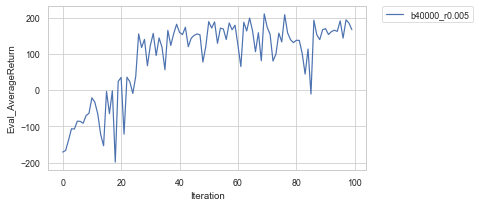

In [559]:
data_q3 = read_data('q3','LunarLanderContinuous-v2')
plot_return(data_q3, 'q3')